# Install Library for Savitzky Golay Filter and Chart Studio (for plotting purpose)

In [1]:
!pip install loess
!pip install chart_studio

  Created wheel for loess: filename=loess-2.0.11-cp37-none-any.whl size=12412 sha256=6ac474afeb9ed5a1b4ec94c6fca41e5a1f5276db65130ac86d575e82f4434048
  Stored in directory: /root/.cache/pip/wheels/fc/ac/fb/6383116b5e06d69eeb3e209bf8c6124f58f3e09e2cdd0eb0d7
  Created wheel for plotbin: filename=plotbin-3.1.3-cp37-none-any.whl size=12840 sha256=fd783b2d46a9128f4cc801725b4324e0ad875e9090e8415e8b69dd10d3750939
  Stored in directory: /root/.cache/pip/wheels/72/01/3c/1e634466f4bcb928573adf1a2ad4550f249d23a7695aaf2867
Successfully built loess plotbin
     |████████████████████████████████| 71kB 3.3MB/s 


# Import Library

## Plotting Library

In [2]:
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio
import plotly.express as px
chart_studio.tools.set_credentials_file(username='DerniAgeng', api_key='ZMAguW1HDlV8v7EYvqVJ')

## Preprocessing Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import loess
from sklearn.neighbors.kde import KernelDensity
import pandas as pd
from scipy.signal import savgol_filter
from scipy.signal import savgol_coeffs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



# Example for using the smoothing function

Setting plot size

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]

Generate dataset with random value of noise


In [ ]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2

In [ ]:
y

array([ 0.09707406,  0.19201899,  0.17381691,  0.20046238,  0.44894578,
        0.31214627,  0.55424989,  0.45220809,  0.61220591,  0.72105768,
        0.65272701,  0.84125124,  0.77390574,  0.88962414,  0.78586307,
        0.94216661,  0.87172018,  0.99459081,  1.08612146,  0.98279812,
        0.99789428,  1.05842076,  1.01880328,  1.12452182,  1.18120164,
        1.04384493,  1.13244866,  1.00873781,  1.17343122,  1.10055843,
        0.94932228,  1.04707763,  0.93850075,  1.01197872,  0.89598919,
        0.92763831,  0.81299049,  0.8623261 ,  0.68809761,  0.72448752,
        0.62951471,  0.53898415,  0.55657293,  0.49123705,  0.42909676,
        0.28763226,  0.27780857,  0.34793599,  0.21184457,  0.15894545,
        0.06666906,  0.03630793, -0.14146085, -0.2111416 , -0.15769964,
       -0.17989787, -0.31679093, -0.43465313, -0.48896087, -0.37886828,
       -0.50047185, -0.53620412, -0.51352178, -0.65071147, -0.67544302,
       -0.72702901, -0.67289561, -0.78654943, -0.74455817, -0.93

Use savitzky golay filter with 3 arguments (data_target, order polinomial, window size)

In [ ]:
yhat = savgol_filter(y, 5, 2)

Checking the coeeficient of savitky golay filter

In [ ]:
savgol_coeffs(5, 2)

array([-0.08571429,  0.34285714,  0.48571429,  0.34285714, -0.08571429])

Plot Result

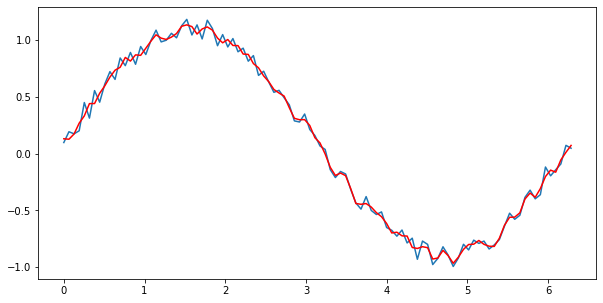

In [ ]:
plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

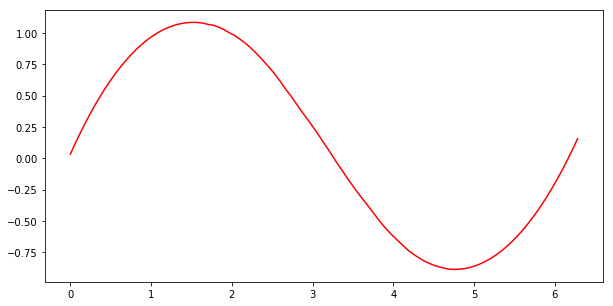

In [ ]:
plt.plot(x,yhat, color='red')
plt.show()

# Refining Dataset
## Load Dataset

In [22]:
data = pd.read_csv('solarbuilding_interpolation_202007-202104.csv')

We interpolate the value again in case there is stil missing value cause by merging dataset in previous step

In [23]:
data = data.interpolate()
data.head()

,Unnamed: 0,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,session,weekend,Temperature
0,0,2020-07-15 00:00:00,4.0,1.0,1.5,1.0,60.013239,1218.977273,5432.898106,1,0,29.6
1,1,2020-07-15 01:00:00,4.0,1.0,1.5,1.0,60.010476,2211.735931,5821.043831,0,0,30.4
2,2,2020-07-15 02:00:00,4.0,1.0,1.5,1.0,60.013750,2538.500000,5822.917500,0,0,30.2
3,3,2020-07-15 03:00:00,4.0,1.0,1.5,1.0,59.988197,1989.027632,5129.333684,0,0,29.9
4,4,2020-07-15 04:00:00,4.0,1.0,1.5,1.0,59.998750,2076.041667,5826.947917,0,0,29.8


Plot original data

<function matplotlib.pyplot.show>

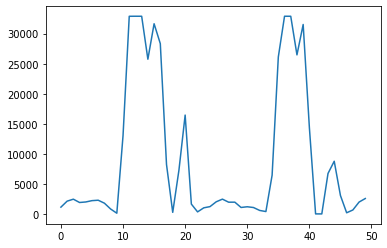

In [24]:
plt.plot(data['p_sum'][:50])
plt.show

Refining the dataset using savitzky golay filter

In [25]:
yhat = savgol_filter(data['p_sum'],11,1)

Plot the result

<function matplotlib.pyplot.show>

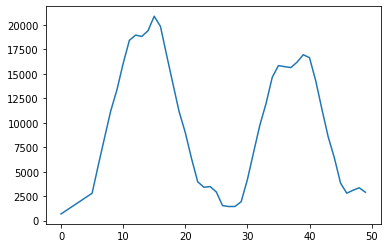

In [26]:
plt.plot(yhat[:50])
plt.show

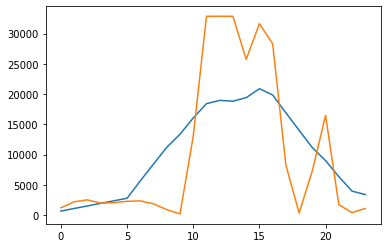

In [27]:
plt.plot(yhat[:24])
plt.plot(data['p_sum'][:24])

Replace the original value with refined value

In [28]:
data['p_sum'] = yhat 

Check missing values on dataset

In [29]:
data.isna().sum()

Unnamed: 0        0
lastReportTime    0
meterType         0
slaveAddr         0
blockId           0
wire              0
freq              0
p_sum             0
ae_tot            0
session           0
weekend           0
Temperature       0
dtype: int64

Save the new dataset

In [30]:
data.to_csv('solarbuilding_interpolation_SGF_202007-202104.csv')

In [ ]:
data['p_sum'] = yhat
data.head()

,lastReportTime,p_sum,weekend,session,ae_tot,Temp(¢J),hour
0,2020-07-01 00:00:00,9343.424496,0.0,1.0,27097.435870,27.2,0
1,2020-07-01 01:00:00,9291.243243,0.0,0.0,27329.537209,29.1,1
2,2020-07-01 02:00:00,9239.061990,0.0,0.0,26733.469892,28.9,2
3,2020-07-01 03:00:00,9186.880736,0.0,0.0,27180.278495,28.6,3
4,2020-07-01 04:00:00,9134.699483,0.0,0.0,27191.283333,28.5,4


In [ ]:
len(data)

4080

Plot with Chart Studio

In [ ]:
fig = go.Figure(go.Scatter(y=data['p_sum'], name="Refined"))
pio.show(fig)